# Course-End Project: Healthcare

## Problem statement

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health.

### Dataset description:

| Variable | Description |
| --- | --- |
| Age | Age in years |
| Sex | 1 = male; 0 = female |
| cp | Chest pain type |
| trestbps | Resting blood pressure (in mm Hg on admission to the hospital) |
| chol | Serum cholesterol in mg/dl |
| fbs | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| restecg | Resting electrocardiographic results |
| thalach | Maximum heart rate achieved |
| exang | Exercise induced angina (1 = yes; 0 = no) |
| oldpeak | ST depression induced by exercise relative to rest |
| slope | Slope of the peak exercise ST segment |
| ca | Number of major vessels (0-3) colored by fluoroscopy |
| thal | 3 = normal; 6 = fixed defect; 7 = reversible defect |
| Target | 1 or 0 |

**Note**: Download CEP 1_ Dataset.xlsx using the link given in the Healthcare project problem statement.

## Task to be performed



### 1. Preliminary analysis:

a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
df = pd.read_excel('Dataset.xlsx')

In [6]:
# Print the first few rows of the DataFrame
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [7]:
# Structure of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [8]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# Check for duplicate rows
print(df.duplicated().sum())

1


In [10]:
# Remove duplicates
df = df.drop_duplicates()

In [11]:
# Fill missing values with the mean of the column
df = df.fillna(df.mean())

### 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data.

b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as a count plot.

c. Study the occurrence of CVD across the Age category.

d. Study the composition of all patients with respect to the Sex category.

e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient.

f. Describe the relationship between cholesterol levels and the target variable.

g. State what relationship exists between peak exercising and the occurrence of a heart attack.

h. Check if thalassemia is a major cause of CVD.

i. List how the other factors determine the occurrence of CVD.

j. Use a pair plot to understand the relationship between all the given variables.

In [12]:
# Print the statistical summary of the data
print(df.describe())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

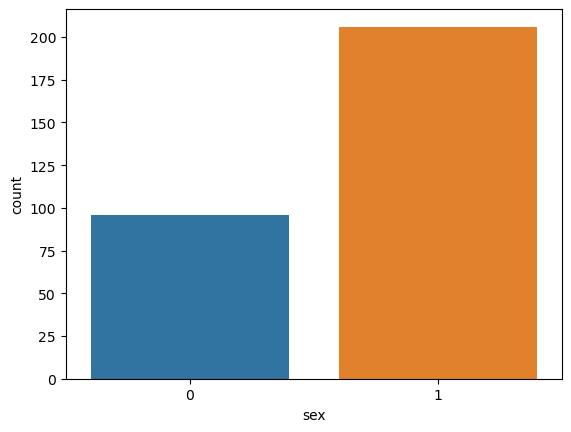

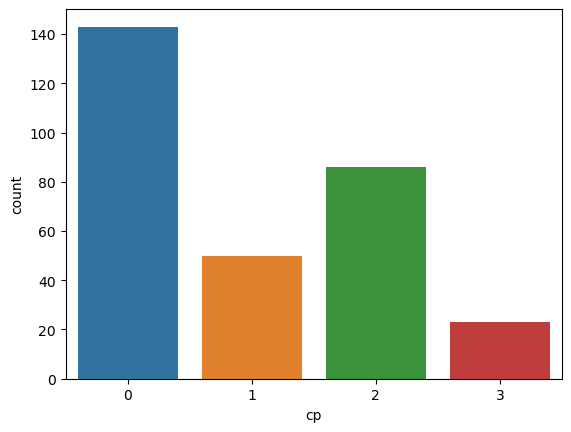

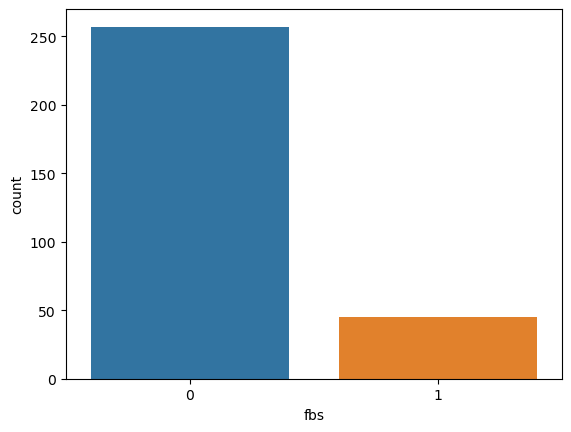

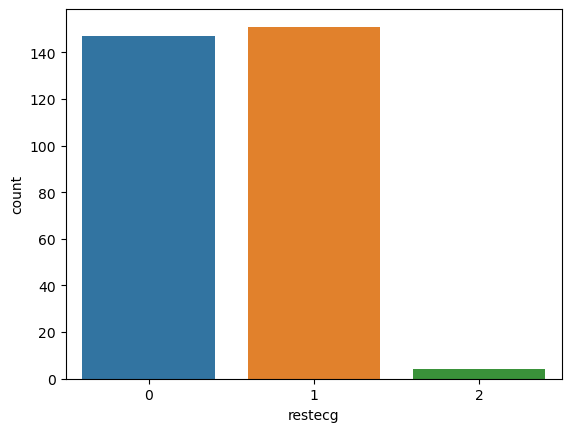

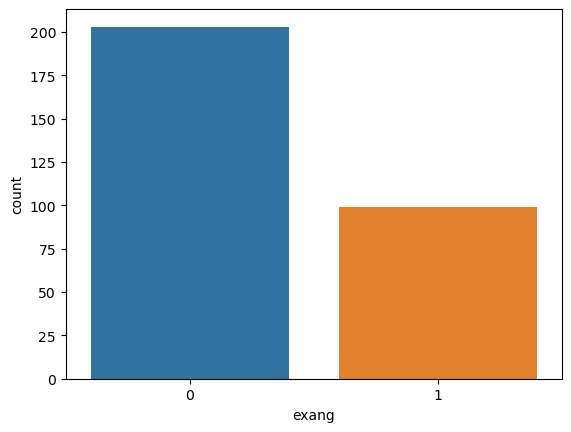

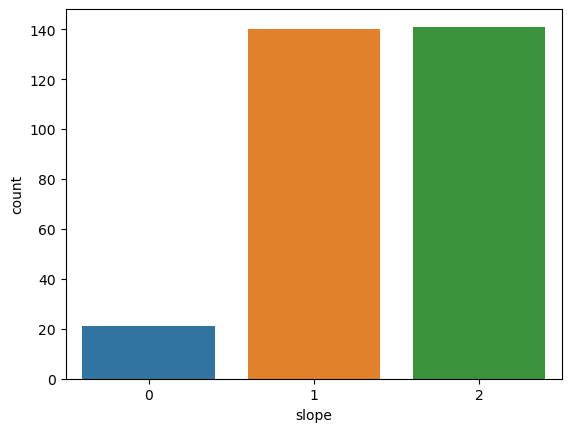

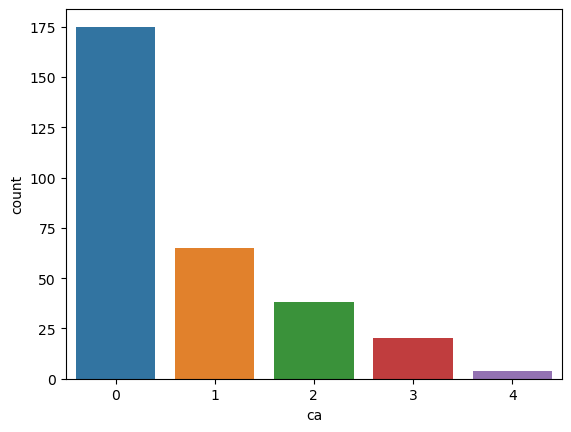

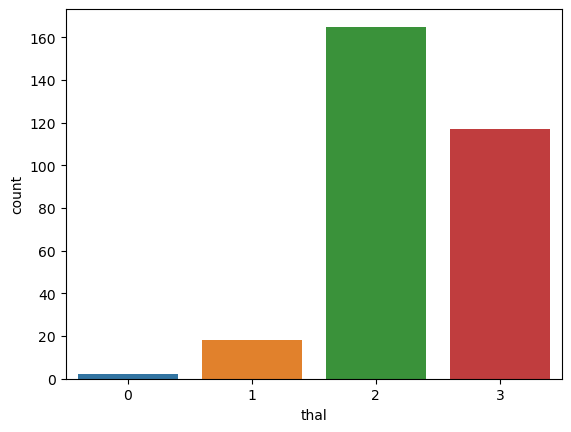

In [13]:
# Categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Count plot for each categorical variable
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.show()

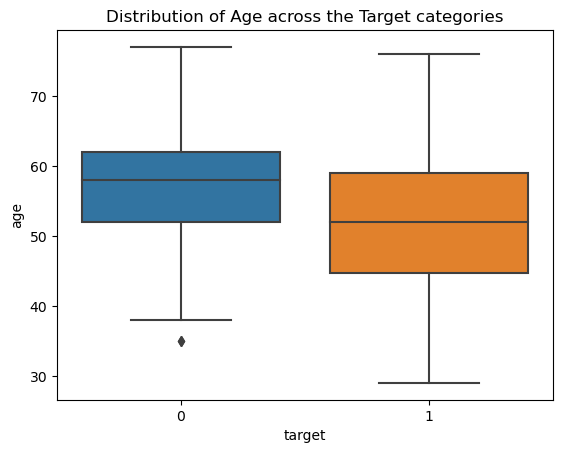

In [14]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribution of Age across the Target categories')
plt.show()


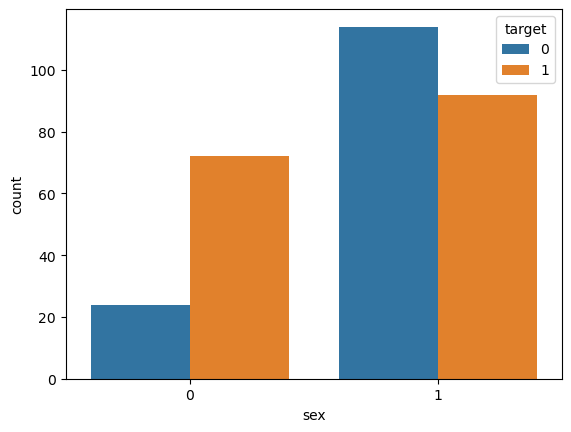

In [15]:
# Sex vs Target
sns.countplot(x='sex', hue='target', data=df)
plt.show()

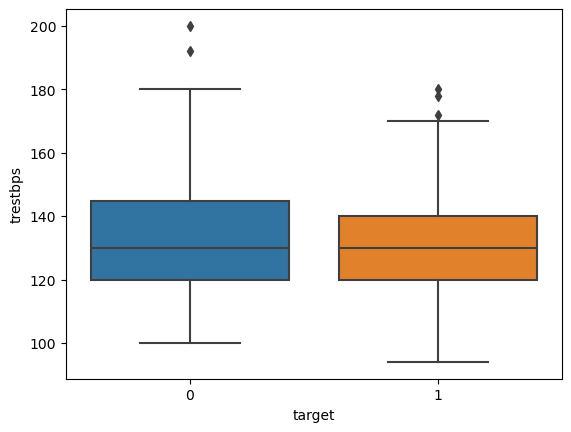

In [16]:
# trestbps vs Target
sns.boxplot(x='target', y='trestbps', data=df)
plt.show()

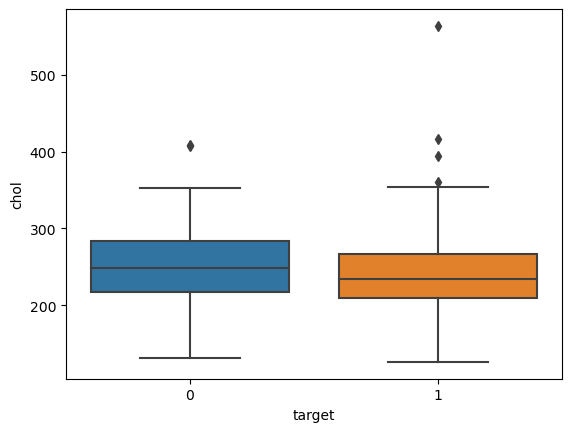

In [17]:
# chol vs Target
sns.boxplot(x='target', y='chol', data=df)
plt.show()

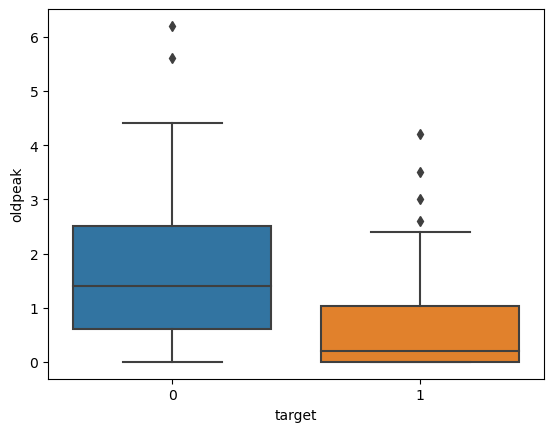

In [18]:
# oldpeak vs Target
sns.boxplot(x='target', y='oldpeak', data=df)
plt.show()

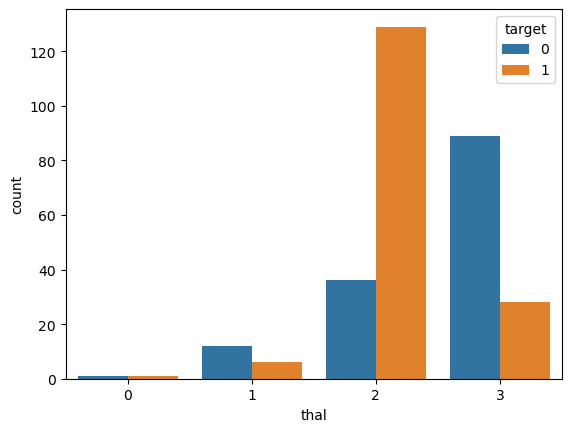

In [19]:
# thal vs Target
sns.countplot(x='thal', hue='target', data=df)
plt.show()

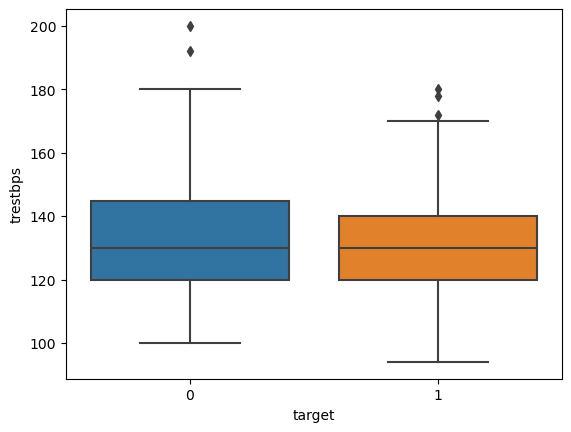

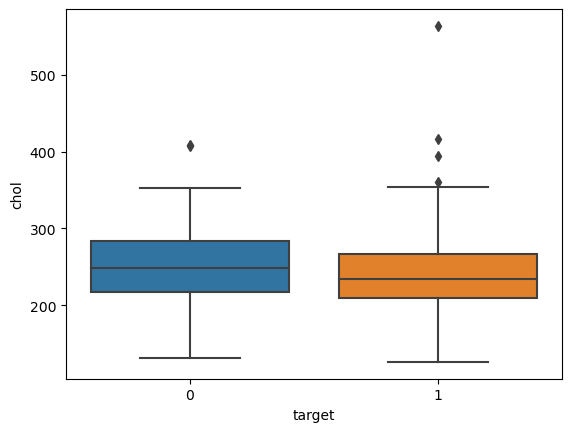

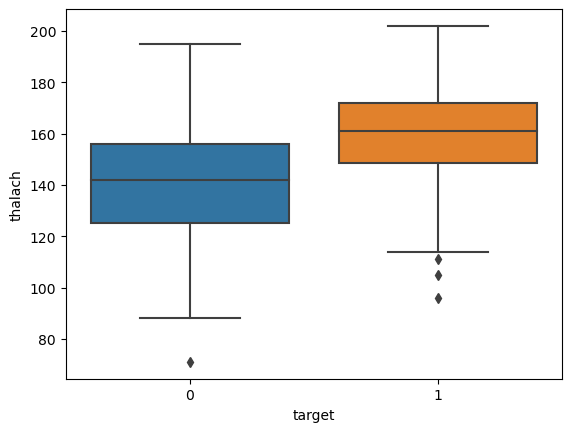

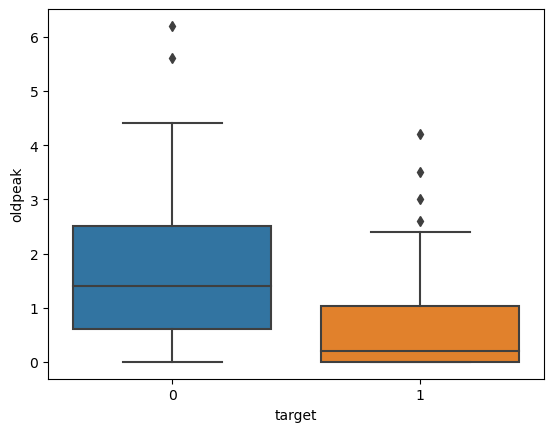

In [20]:
# Other factors vs Target
other_factors = ['trestbps', 'chol', 'thalach', 'oldpeak']
for factor in other_factors:
    sns.boxplot(x='target', y=factor, data=df)
    plt.show()

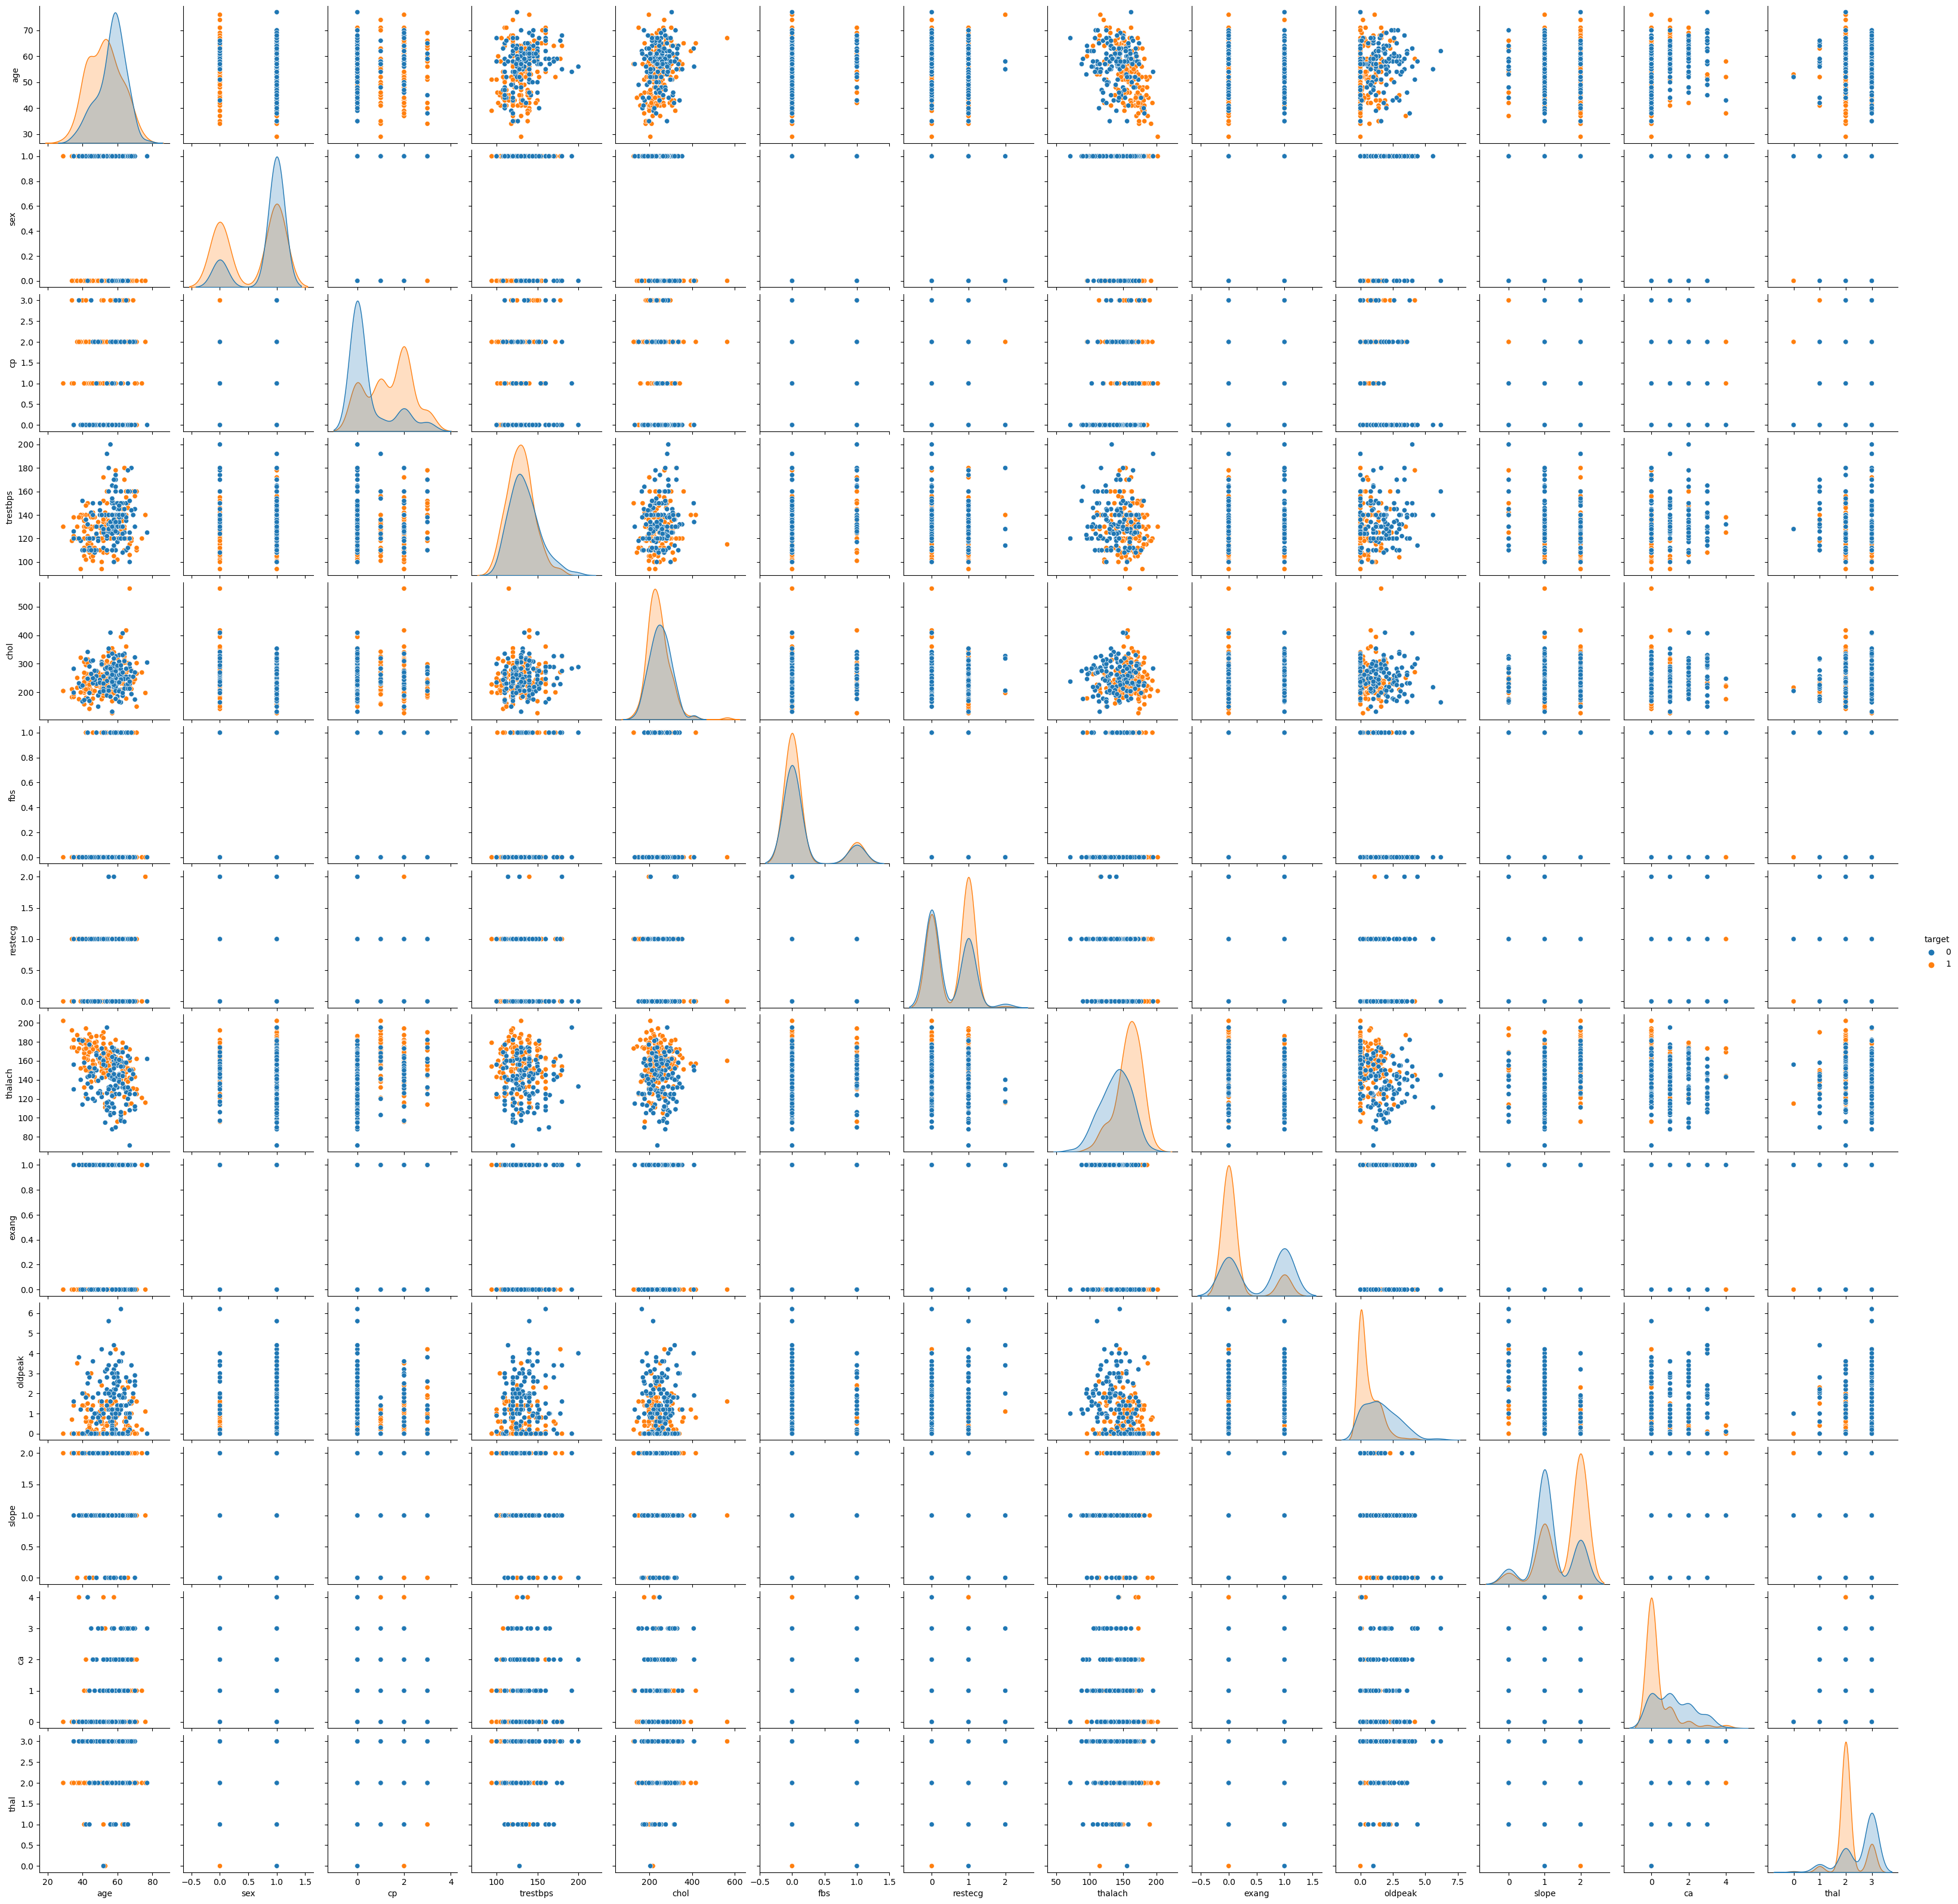

In [21]:
# Pairplot of all variables
sns.pairplot(df, hue='target')
plt.show()

### 3. Build a baseline model to predict the risk of a heart attack using logistic regression and random forest. Explore the results using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection.

In [ ]:
%pip install pandas numpy sklearn matplotlib seaborn statsmodels

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [25]:
X = df.drop('target', axis=1)
y = df['target']


In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Build the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

print('Confusion Matrix for Logistic Regression:')
print(confusion_matrix(y_test, y_pred_lr))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix for Logistic Regression:
[[24  5]
 [ 6 26]]


In [29]:
# Build the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print('Classification Report for Random Forest:')
print(classification_report(y_test, y_pred_rf))

print('Confusion Matrix for Random Forest:')
print(confusion_matrix(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix for Random Forest:
[[26  3]
 [ 4 28]]


In [31]:
# Compute and print correlations with the target variable
correlations = df.corr()['target'].sort_values()
print(correlations)

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64


In [32]:
log_reg_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Print the summary of the model
print(log_reg_sm.summary())


Optimization terminated successfully.
         Current function value: 0.347733
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           13
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                  0.4950
Time:                        23:39:36   Log-Likelihood:                -83.804
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 2.662e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0234      0.208     -0.113      0.910      -0.430       0.383
x1             0.0256      0.